In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from varname import varname, nameof

In [5]:
v_folder = 'DataSets/'

In [6]:
# getting ideal regime (labels) -  3 regimes: "low_variance", "medium_variance" and "high_variance"
v_target1 = pd.read_csv('ideal_regimes.csv')
v_target1.index = pd.to_datetime(v_target1['date'].values, infer_datetime_format=True)
v_target1.sort_index(inplace=True)
v_target1.drop(['date'], axis=1, inplace=True)
v_target1.info()
v_target1.head(15)

FileNotFoundError: [Errno 2] File b'ideal_regimes.csv' does not exist: b'ideal_regimes.csv'

In [7]:
v_target1.tail(15)

NameError: name 'v_target1' is not defined

In [8]:
# changing labels manually (according to evidence)
v_target1.loc['20150807', 'regime'] = 'low_variance'
v_target1.loc['20181005', 'regime'] = 'low_variance'

NameError: name 'v_target1' is not defined

In [9]:
# turning ideal regime into 2 regimes: "BULL" (normal) and "BEAR" (abnormal) 
v_target_two_class = v_target1.copy()
v_target_two_class['regime'][v_target_two_class['regime']=='low_variance'] = 'BULL'
v_target_two_class['regime'][v_target_two_class['regime'].isin(['medium_variance', 'high_variance'])] = 'BEAR'

# some changes 
date1 = '20120504'
date2 = '20120615'
v_target_two_class.loc[date1:date2,'regime'] = 'BULL'


v_target_two_class

NameError: name 'v_target1' is not defined

In [10]:
v_sp500 = pd.read_csv(v_folder + 'S&P500_weekly.csv', 
                      usecols=['date', 'close'],
                      parse_dates=True
                      )
v_sp500['date'] = pd.to_datetime(v_sp500['date'].values)
v_sp500.index = v_sp500['date'].values
v_sp500.sort_index(inplace=True)
v_sp500.drop(['date'], axis=1, inplace=True)
v_sp500.info()
v_sp500.head(15)

FileNotFoundError: [Errno 2] File b'DataSets/S&P500_weekly.csv' does not exist: b'DataSets/S&P500_weekly.csv'

In [136]:
v_sp500.tail(15)

,close
2020-03-27,2541.469971
2020-04-03,2488.649902
2020-04-10,2789.820068
2020-04-17,2874.560059
2020-04-24,2836.739990
2020-05-01,2830.709961
2020-05-08,2929.800049
2020-05-15,2863.699951
2020-05-22,2955.449951
2020-05-29,3044.310059


In [137]:
# inerting target collumn into SP500 data frame
start_date = v_target_two_class.index[0]
end_date = v_target_two_class.index[-1]
v_sp500['regime'] = v_target_two_class.loc[start_date:end_date, 'regime']
v_sp500['log_returns'] = np.log(v_sp500['close'] / v_sp500['close'].shift(1))


v_sp500

,close,regime,log_returns
2000-01-07,1441.469971,NaN,NaN
2000-01-14,1465.150024,BEAR,0.016294
2000-01-21,1441.359985,BEAR,-0.016371
2000-01-28,1360.160034,BEAR,-0.057985
2000-02-04,1424.369995,BEAR,0.046127
...,...,...,...
2020-06-05,3193.929932,BEAR,0.047978
2020-06-12,3041.310059,BEAR,-0.048964
2020-06-19,3097.739990,BEAR,0.018384
2020-06-26,3009.050049,BEAR,-0.029048


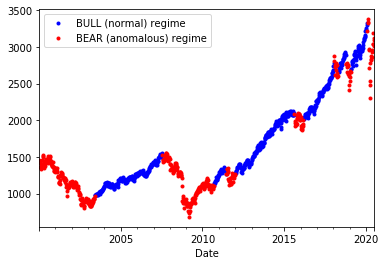

In [138]:
# ploting SP500 ideal regimes along with closing prices

v_sp500_bull = v_sp500['close'].copy()
v_sp500_bull[v_sp500['regime']=='BEAR'] = None
v_sp500_bear = v_sp500['close'].copy()
v_sp500_bear[v_sp500['regime']=='BULL'] = None

v_sp500_bull = v_sp500_bull[start_date:end_date] 
v_sp500_bear = v_sp500_bear[start_date:end_date] 

v_sp500_bull.plot(style='b.', label='BULL (normal) regime')
v_sp500_bear.plot(style='r.', label='BEAR (anomalous) regime')
plt.legend(loc='best')
plt.xlabel('Date')
plt.show()

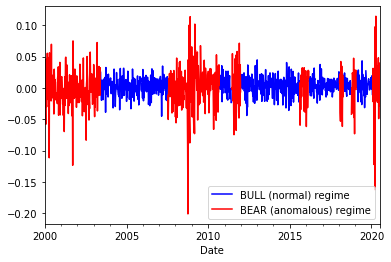

In [139]:
# ploting SP500 ideal regimes along with log returns

v_sp500_bull = v_sp500['log_returns'].copy()
v_sp500_bull[v_sp500['regime']=='BEAR'] = None
v_sp500_bear = v_sp500['log_returns'].copy()
v_sp500_bear[v_sp500['regime']=='BULL'] = None

v_sp500_bull.plot(style='b', label='BULL (normal) regime')
v_sp500_bear.plot(style='r', label='BEAR (anomalous) regime')
plt.legend(loc='best')
plt.xlabel('Date')
plt.show()

In [140]:
# getting the transition samples between regimes (and its k neighbours) 
v_target_num = v_target_two_class.copy()
v_target_num['regime'][v_target_num['regime']=='low_variance'] = -1 
v_target_num['regime'][v_target_num['regime'].isin(['medium_variance', 'high_variance'])] = 1

target_num_array = v_target_num['regime'].values
#print(target_num_array[-10:])

# marca como True as amostras de transicao (Bear-Bull e Bull-Bear) + seus vizinhos na serie de targets
num_trans = 1
v_is_transition_class = np.array([False]*len(target_num_array))
v_is_neighbor_transition_class = np.array([False]*len(target_num_array))
for i in range(1, len(target_num_array)):
    if target_num_array[i] != target_num_array[i-1]:
        v_is_transition_class[i] = True
        for j in range(min(i+1,len(target_num_array)), min(i+num_trans, len(target_num_array))):
            v_is_neighbor_transition_class[j] = True

#print(v_is_transition_class[-10:])
#print(v_is_neighbor_transition_class[-10:])

v_is_transition = v_is_transition_class | v_is_neighbor_transition_class
#print(v_is_transition[-10:])


In [141]:
# plots the dates in which the transition pccurs between the regimes 

v_sp500.loc[start_date:end_date, 'is_transition'] = v_is_transition 

# bolean expressions for filtering transition dates
is_trans = v_sp500['is_transition']
is_bear = v_sp500['regime'] == 'BEAR'
is_bull = v_sp500['regime'] == 'BULL'

bear_transition_dates = v_sp500[is_trans & is_bear].index
print('BULL-BEAR transition dates:', bear_transition_dates)

bull_transition_dates = v_sp500[is_trans & is_bull].index
print('BEAR-BULL transition dates:', bull_transition_dates)


BULL-BEAR transition dates: DatetimeIndex(['2007-07-20', '2011-06-17', '2015-08-14', '2018-01-19',
               '2018-10-12', '2020-01-31'],
              dtype='datetime64[ns]', freq=None)
BEAR-BULL transition dates: DatetimeIndex(['2003-06-06', '2010-09-17', '2012-01-06', '2016-03-11',
               '2018-04-13', '2019-02-01'],
              dtype='datetime64[ns]', freq=None)


In [142]:
# saving SP500 DataFrame with labels in a .csv file
#v_sp500_with_targets = v_sp500.copy()
#file_name = 'sp500_target_regimes'
#v_sp500_with_targets.to_csv(v_folder + file_name, encoding='utf-8')